<a href="https://colab.research.google.com/github/narrasriram/EMOTION-RECOGNITION-USING-FINE-TUNED-MODELS-ERFM-/blob/main/Colab%20Model%20building%20Files/Classification/Models%20on%20Emotion%20Stimulus%20Dataset/Fine-tuning%20Distilbert/ktrain_distilbert_with_emotion_stimulus_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Shamsul Arefin

**Description**: In this file I implemented the Fine tuning of pretrained DistilBERT Model with the ktrain package. The dataset used is the Emotion Stimulus dataset. I also showed KFold validation.

**Installing ktrain wrapper library**

In [ ]:
!pip3 install ktrain

Processing /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2/ktrain-0.26.2-cp37-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f5/99/e0808cb947ba10f575839c43e8fafc9cc44e4a7a2c8f79c60db48220a577/sentencepiece-0.1.95-cp37-cp37m-manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f4/cb/64623369f348e9bfb29ff898a57ac7c91ed4921f228e9726546614d63ccb/scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/80/72/a4fba7559978de00cf44081c548c5d294bf00ac7dcda2db405d2baa8c67a/cchardet-2.1.7-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f9/54/5ca07ec9569d2f232f3166de5457b63943882f7950ddfcc887732fc7fb23/transformers-4.3.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ba/19/24d0f1f454a2c1eb689ca28d2f178db81e5024f42d82729a4ff6771155cf/Whoosh-2.7.4-py2.py3-none-any.whl
Processing /root/.cache/pip/whee

**Installing other dependecies such as pandas, numpy**

In [ ]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

**Mounting google drive storage**

In [ ]:
cd drive/MyDrive/bert-project-data/

/content/drive/MyDrive/bert-project-data


**Importing dependencies for the preprocessing of Emotion stimulus data**

In [ ]:
# For emotion
from pandas import DataFrame
import textblob
from textblob import TextBlob

**Opening the Emotion Stimulus Text data as File**

In [ ]:
# For emotion
with open('./No Cause.txt') as f:
    conversations = f.readlines()

**Preprocessing Emotion Stimulus data  with Regex Check and BeautifulSoup library**

In [ ]:
#For emotion data
import re
from bs4 import BeautifulSoup

data = {}

for line in conversations:
    result = re.search(r"<[a-zA-z]+>", line)
    emotion = result.group(0)
    emotion  = emotion[1:(len(emotion)-1)]
    #print(emotion)

    soup = BeautifulSoup(line)
    x = soup.findAll(emotion)
    #print(x)

    txt = ''.join(x[0].findAll(text=True)).strip()

    data[txt] = emotion
print(data)

{'This did the trick : the boys now have a more distant friendship and David is much happier .': 'happy', 'When Anna left Inspector Aziz , she was much happier .': 'happy', "And though , as Lachlan had planned , they had expected the attack in the morning , they were quite happy when their lookouts reported the Macleans ' approach in the early evening .": 'happy', "Honestly , I 'm really happy for you !": 'happy', 'Lesley was totally happy about it .': 'happy', 'For once in his life , Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition .': 'happy', 'She became happier , more settled .': 'happy', 'During the day her mother seemed happy at times , baking , trying out fresh recipes , or changing yet again the curtains , or crocheting new chair-backs .': 'happy', 'They seemed happy about my victory in Germany and most of them expected me to win more races last year . "': 'happy', 'Never before had Bodmin seen so many faces 

**Formatting the data and Dividing Data into Test and Train**

In [ ]:
#For emotion data
from sklearn.model_selection import train_test_split
data_frame = DataFrame(data.items(), columns=['Emotion', 'Text'])
X_all = data_frame.Emotion.tolist()
y_all = data_frame.Text.tolist()
class_names = ['happy', 'sad', 'fear', 'anger', 'disgust','shame','surprise']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,test_size=0.2, random_state=4)
print('size of train set: %s' % (len(X_train)))
print('size of test set: %s' % (len(X_test)))
data_frame.head(10)

size of train set: 1271
size of test set: 318


,Emotion,Text
0,This did the trick : the boys now have a more ...,happy
1,"When Anna left Inspector Aziz , she was much h...",happy
2,"And though , as Lachlan had planned , they had...",happy
3,"Honestly , I 'm really happy for you !",happy
4,Lesley was totally happy about it .,happy
5,"For once in his life , Leopold must have been ...",happy
6,"She became happier , more settled .",happy
7,During the day her mother seemed happy at time...,happy
8,They seemed happy about my victory in Germany ...,happy
9,Never before had Bodmin seen so many faces an...,happy


**Changing string encoding of labels to integers for model preprocessing**

In [ ]:
encoding = {
    'happy': 0,
    'sad': 1,
    'fear': 2,
    'anger': 3,
    'disgust':4,
    'shame':5,
    'surprise':6
}

# Integer values for each class
y_test_string_backup = y_test.copy()
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

**Doing KFold Validation**

In [ ]:
# kfold
from sklearn.model_selection import KFold
kf= KFold(n_splits=5, random_state=None, shuffle=True)
fold_no = 1
losses_array = []
validation_losses_array = []
accuracy_array = []
validation_accuracy_array = []
for train_index_list, test_index_list in kf.split(X_all):
  x_train_n = [X_all[index] for index in train_index_list]
  x_test_n = [X_all[index] for index in test_index_list]
  y_train_n = [y_all[index] for index in train_index_list]
  y_test_n = [y_all[index] for index in test_index_list]

  #do all the things
  y_train_n = [encoding[x] for x in y_train_n]
  y_test_n = [encoding[x] for x in y_test_n]
  train_t,test_t, preproc = text.texts_from_array(x_train=x_train_n, y_train=y_train_n,
                                                                       x_test=x_test_n, y_test=y_test_n,
                                                                       class_names=class_names,
                                                                       preprocess_mode='distilbert',
                                                                       maxlen=350, 
                                                                       max_features=35000)
  model = text.text_classifier('distilbert', train_data=train_t, preproc=preproc)
  learner = ktrain.get_learner(model, train_data=train_t, val_data=test_t, batch_size=6)
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  fold_no = fold_no + 1
  history_val = learner.fit_onecycle(2e-5, 10)
  losses_array.append(history_val.history['loss'])
  validation_losses_array.append(history_val.history['val_loss'])
  accuracy_array.append(history_val.history['accuracy'])
  validation_accuracy_array.append(history_val.history['val_accuracy'])
print("K fold validaiton finished..............................")

**Printing KFold validation summary**

In [ ]:
#K Fold validation summary
print("Summary of K (split =5 ) fold validation. You see accuraccy and other metrices for each fold for each epoch")
for i in range(0,5):
  print("For fold "+str(i+1))
  print("Accuracy for 4 epochs::")
  print(accuracy_array[i])
  print("Validation Accuracy for 4 epochs::")
  print(validation_accuracy_array[i])
  print("Loss for 4 epochs::")
  print(losses_array[i])
  print("Validation loss for 4 epochs::")
  print(validation_losses_array[i])
  print("-------------END OF ONE FOLD RESULT-----------")

**Plotting Losses and Accuracy of KFold Validation**

In [ ]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(5, 2) #Making 5*2 plots
fig.set_size_inches(18.5, 15.5) #specifying specific Size
fig.tight_layout(pad=4.0) #Creating spacing

for i in range(0,5):
  # print("Loss, Accuracy for Fold "+ str(i+1) + "-----------------")
  axs[i, 0].text(0.02, 2.05, "Training and validation loss for Fold"+str(i+1), fontsize=14)
  axs[i, 0].plot(losses_array[i], label='loss')
  axs[i, 0].plot(validation_losses_array[i], label='val_loss')
  axs[i, 0].legend()
  axs[i, 0].grid(True)

  axs[i, 1].text(0.02, 1.05, "Training and validation accuracy for Fold"+str(i+1), fontsize=14)
  axs[i, 1].plot(accuracy_array[i], label='accuracy')
  axs[i, 1].plot(validation_accuracy_array[i], label='val_accuracy')
  axs[i, 1].legend()
  axs[i, 1].grid(True)

alt = 0
for ax in axs.flat:
  if alt == 0:
    alt = 1
    ax.set(xlabel='Epoch', ylabel='Loss[MPG]')
  else:
    alt =0
    ax.set(xlabel='Epoch', ylabel='Accuracy[MPG]')

    

**Preprocessing input data for the DistilBERT model by the library**

In [ ]:
train_t,test_t, preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='distilbert',
                                                                       maxlen=350, 
                                                                       max_features=35000)


preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 36
	99percentile : 39


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 35
	99percentile : 39


task: text classification


**Defining model with the preprocessed data**

In [ ]:
model = text.text_classifier('distilbert', train_data=train_t, preproc=preproc)

Is Multi-Label? False
maxlen is 350



done.


**Intializing a learner object from the model to train**

In [ ]:
#This is stable code
learner = ktrain.get_learner(model, train_data=train_t, val_data=test_t, batch_size=6)

**Training the model with 4 epoch and 2e-5 learning rate**

In [ ]:
#This is stable code
val = learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
212/212 [==============================] - 61s 241ms/step - loss: 1.9102 - accuracy: 0.1889 - val_loss: 1.4077 - val_accuracy: 0.6258
Epoch 2/4
212/212 [==============================] - 51s 238ms/step - loss: 1.0240 - accuracy: 0.7590 - val_loss: 0.2342 - val_accuracy: 0.9591
Epoch 3/4
212/212 [==============================] - 52s 242ms/step - loss: 0.2018 - accuracy: 0.9751 - val_loss: 0.1498 - val_accuracy: 0.9654
Epoch 4/4
212/212 [==============================] - 52s 245ms/step - loss: 0.0705 - accuracy: 0.9939 - val_loss: 0.0924 - val_accuracy: 0.9843


**Validating the model on the test data and getting Confusion Matrix**

In [ ]:
cm = learner.validate(val_data=test_t, class_names=class_names)

              precision    recall  f1-score   support

       happy       0.98      1.00      0.99        58
         sad       0.99      0.98      0.98        97
        fear       0.95      0.98      0.96        53
       anger       1.00      0.97      0.98        62
     disgust       1.00      1.00      1.00         6
       shame       1.00      1.00      1.00        16
    surprise       1.00      1.00      1.00        26

    accuracy                           0.98       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.98      0.98      0.98       318



**Plotting the confusion matrix**

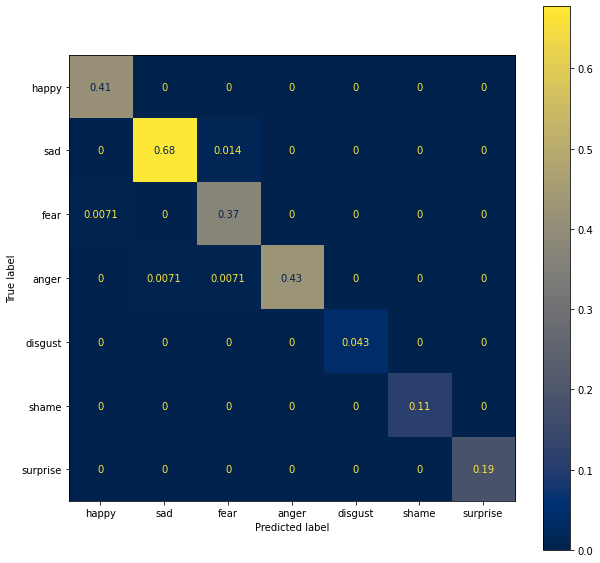

In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
import matplotlib.pyplot as plt


norm = np.linalg.norm(cm)
normal_array = cm/norm

disp = ConfusionMatrixDisplay(confusion_matrix=normal_array,
                              display_labels=class_names)

#plot_confusion_matrix()

fig, axs = plt.subplots() #defining axis
fig.set_size_inches(10, 10) #specifying specific Size

disp = disp.plot(include_values=True,
                 cmap='cividis', ax=axs, xticks_rotation='horizontal')
#cmap reference:
#https://matplotlib.org/stable/tutorials/colors/colormaps.html

**Getting the predictor object from the trained Model**

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['happy', 'sad', 'fear', 'anger', 'disgust', 'shame', 'surprise']

**Testing the model predictor with a new sentence**

In [ ]:
import time 

message = 'I just broke up with my boyfriend'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: sad (0.06)


**Saving the trained model predictor to Google Drive**

In [ ]:
# let's save the predictor for later use
predictor.save("models/distilbert_model-stimulus/")

**Load the saved model predictor to check if it works**

In [ ]:
#testing if predictor can loaded from storage
predictor = ktrain.load_predictor("models/distilbert_model-stimulus/")

**Feeding a sentence to the retrieved model predictor**

In [ ]:
#testing again
import time 

message = 'I just broke up with my boyfriend'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

 **Getting Weighted Accuracy Score**

In [ ]:
from sklearn.metrics import balanced_accuracy_score
prediction_y = predictor.predict(X_test)
balanced_accuracy_score(y_test_string_backup, prediction_y) # y_test_string_backup is the y_test in the string label format, because in the above we already converted y_test to a  integer label

0.9897507791792197

**ROC Curves**

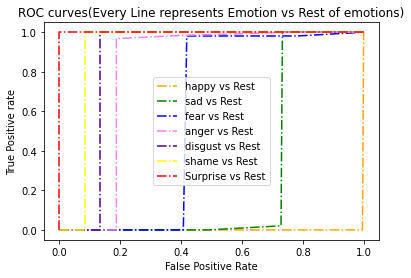

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

false_positive_rate = {}
true_positive_rate = {}
threshold ={}

y_pred = [encoding[x] for x in prediction_y]
y_test_g = [encoding[x] for x in y_test_string_backup]
number_of_classes = 7

for i in range(number_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = roc_curve(y_test_g, y_pred, pos_label=i)
       
plt.plot(false_positive_rate[0], true_positive_rate[0], linestyle='-.',color='orange', label='happy vs Rest')
plt.plot(false_positive_rate[1], true_positive_rate[1], linestyle='-.',color='green', label='sad vs Rest')
plt.plot(false_positive_rate[2], true_positive_rate[2], linestyle='-.',color='blue', label='fear vs Rest')
plt.plot(false_positive_rate[3], true_positive_rate[3], linestyle='-.',color='violet', label='anger vs Rest')
plt.plot(false_positive_rate[4], true_positive_rate[4], linestyle='-.',color='indigo', label='disgust vs Rest')
plt.plot(false_positive_rate[5], true_positive_rate[5], linestyle='-.',color='yellow', label='shame vs Rest')
plt.plot(false_positive_rate[6], true_positive_rate[6], linestyle='-.',color='red', label='Surprise vs Rest')
plt.title('ROC curves(Every Line represents Emotion vs Rest of emotions)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=350); 

**ROC AUC Score**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test_string_backup)

y_test_roc = lb.transform(y_test_string_backup)
y_pred_roc = lb.transform(prediction_y)

In [ ]:
# For Multiclass case
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_roc, y_pred_roc, multi_class='ovo')

0.9934688327723983

**References**:


1.   ktrain official documentation examples: https://nbviewer.jupyter.org/github/amaiya/ktrain/tree/master/examples/
2.   KFold documentation of SKLearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html 
3. Confusion Matrix method: https://stackoverflow.com/a/59170865

